# Description: Decision Tree
# Licence: MIT Licence

## Imports

In [5]:
!pip install -r requirements.txt

In [6]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import graphviz


from sklearn import datasets
# Set up plotting parameters
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)




# Check which Python we're using and install MLX if needed
import sys
print("Python executable:", sys.executable)
print("Python version:", sys.version)

# Check if we're in a virtual environment
import os
if hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix):
    print("✅ Running in virtual environment")
else:
    print("⚠️  Running in system Python")


print("All libraries imported successfully!")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

Python executable: /Users/hmoses/Flinders ML/AI/Lab02_Alia0024/.venv/bin/python
Python version: 3.13.6 (main, Aug  6 2025, 13:05:20) [Clang 17.0.0 (clang-1700.0.13.3)]
✅ Running in virtual environment
All libraries imported successfully!
Python version: 3.13.6 (main, Aug  6 2025, 13:05:20) [Clang 17.0.0 (clang-1700.0.13.3)]
Pandas version: 2.3.1
Scikit-learn version: 1.5.2


# Paractice

In [3]:
# Load the diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'Blood_pressure', 'Skin_thickness',
               'Insulin', 'BMI', 'Diabetes_pedigree', 'Age', 'Outcome']
pid_data = pd.read_csv(url, header=None, names=column_names)

# Display basic info about the dataset
print("Dataset shape:", pid_data.shape)
print("\nFirst 5 rows:")
print(pid_data.head())
print("\nDataset info:")
print(pid_data.info())

Dataset shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  Blood_pressure  Skin_thickness  Insulin   BMI  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   Diabetes_pedigree  Age  Outcome  
0              0.627   50        1  
1              0.351   31        0  
2              0.672   32        1  
3              0.167   21        0  
4              2.288   33        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non

In [4]:
# Statistical summary of the dataset
print("Statistical Summary:")
print(pid_data.describe())

print("\nMissing values:")
print(pid_data.isnull().sum())

print("\nClass distribution:")
print(pid_data['Outcome'].value_counts())

print("\nClass distribution (percentage):")
print(pid_data['Outcome'].value_counts(normalize=True) * 100)

Statistical Summary:
       Pregnancies     Glucose  Blood_pressure  Skin_thickness     Insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.355807       15.952218  115.244002   
min       0.000000    0.000000        0.000000        0.000000    0.000000   
25%       1.000000   99.000000       62.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   30.500000   
75%       6.000000  140.250000       80.000000       32.000000  127.250000   
max      17.000000  199.000000      122.000000       99.000000  846.000000   

              BMI  Diabetes_pedigree         Age     Outcome  
count  768.000000         768.000000  768.000000  768.000000  
mean    31.992578           0.471876   33.240885    0.348958  
std      7.884160           0.331329   11.760232    0.476951  
min      0.000000       

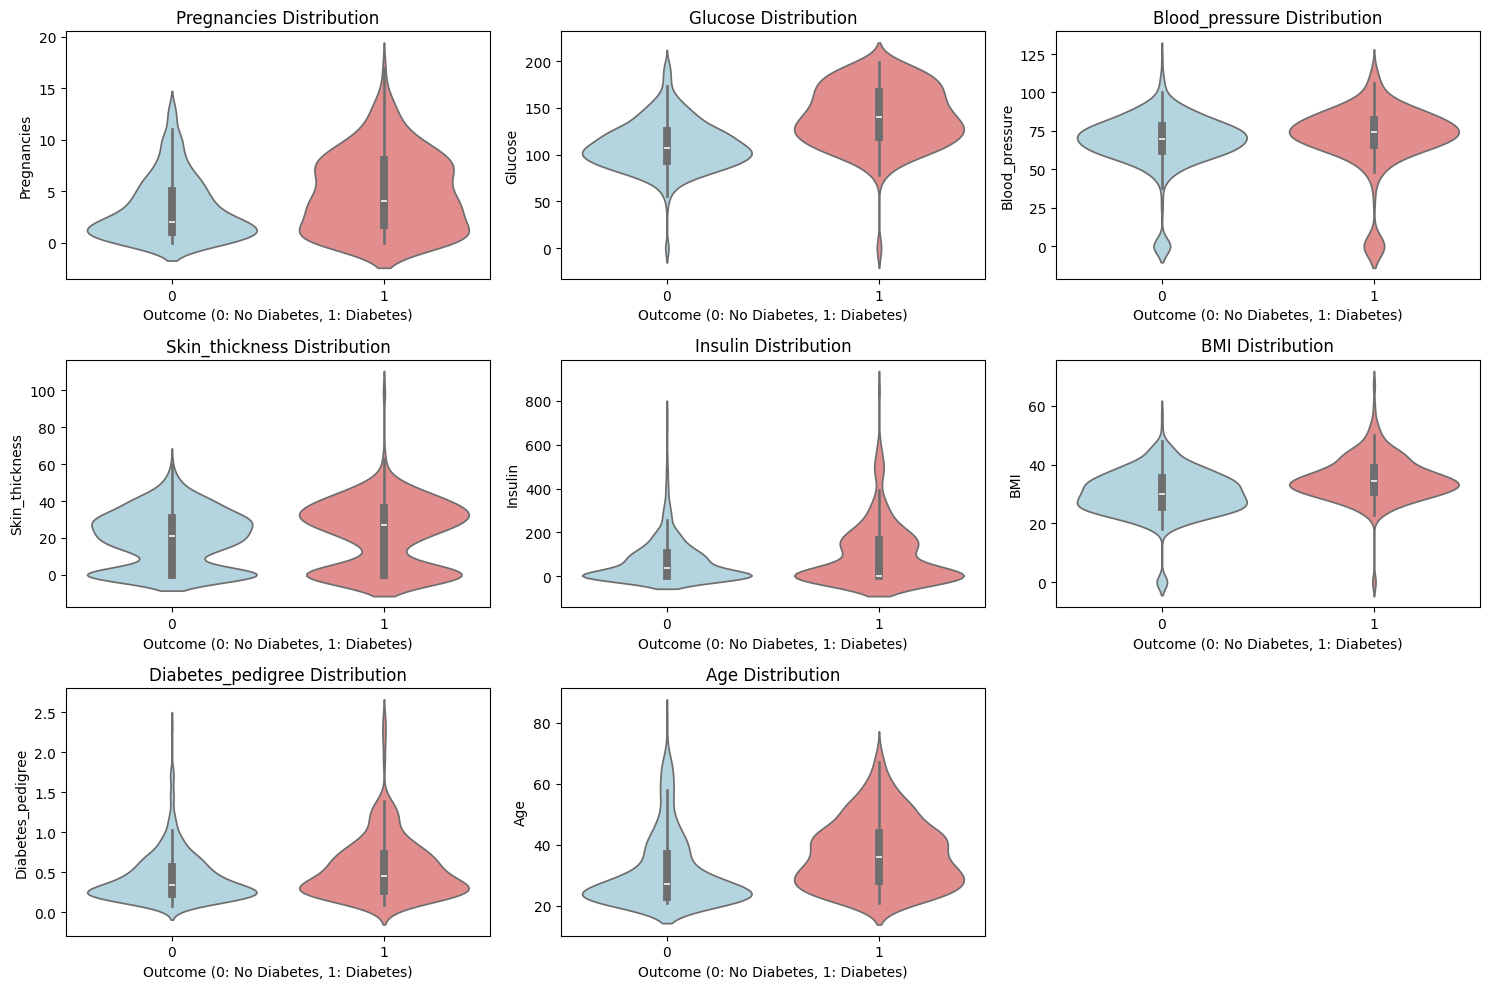

Feature correlations with Outcome:
Glucose: 0.467
BMI: 0.293
Age: 0.238
Pregnancies: 0.222
Diabetes_pedigree: 0.174
Insulin: 0.131
Skin_thickness: 0.075
Blood_pressure: 0.065


In [5]:
# Define features (all columns except 'Outcome')
features = pid_data.columns[:-1]

# 6. Violin plots - shows distribution shape and density
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='Outcome', y=feature, data=pid_data, palette=['lightblue', 'lightcoral'])
    plt.title(f'{feature} Distribution')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.tight_layout()
plt.show()

# 7. Feature importance based on correlation with target
feature_corr = pid_data.corr()['Outcome'].abs().sort_values(ascending=False)[1:]
plt.figure(figsize=(10, 6))
feature_corr.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Correlation with Diabetes Outcome')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("Feature correlations with Outcome:")
for feature, corr in feature_corr.items():
    print(f"{feature}: {corr:.3f}")

## Visualise

<Figure size 1500x1200 with 0 Axes>

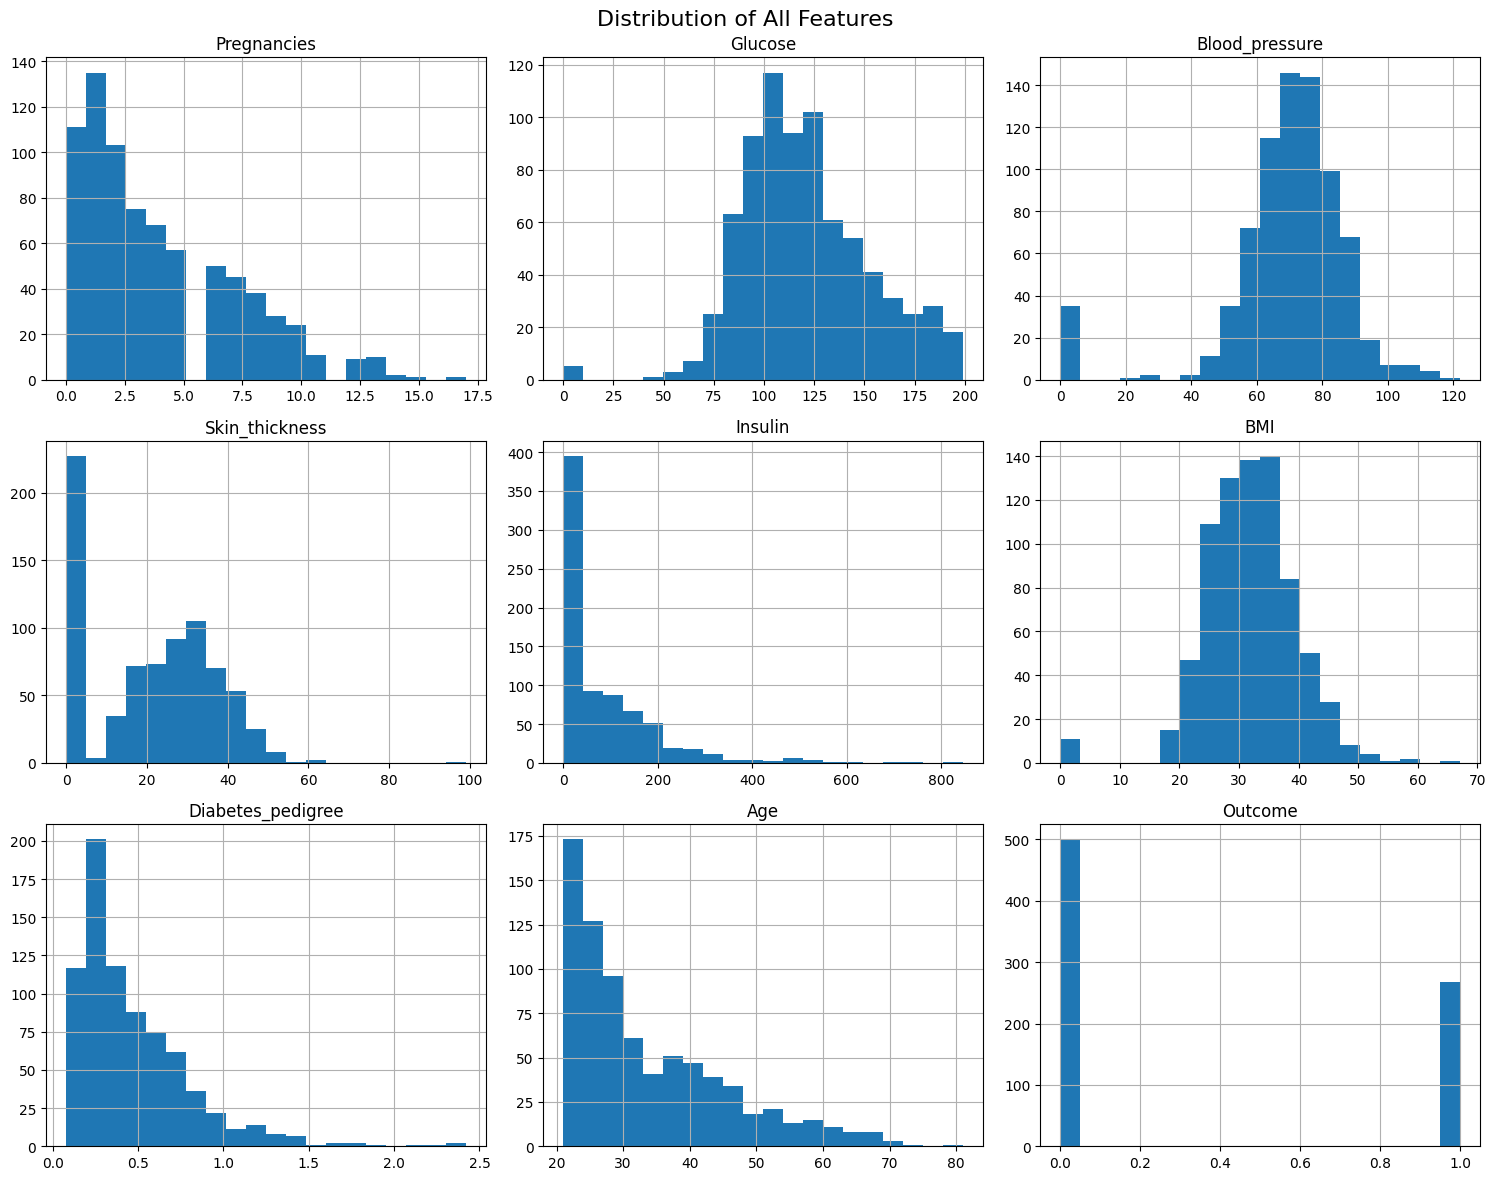

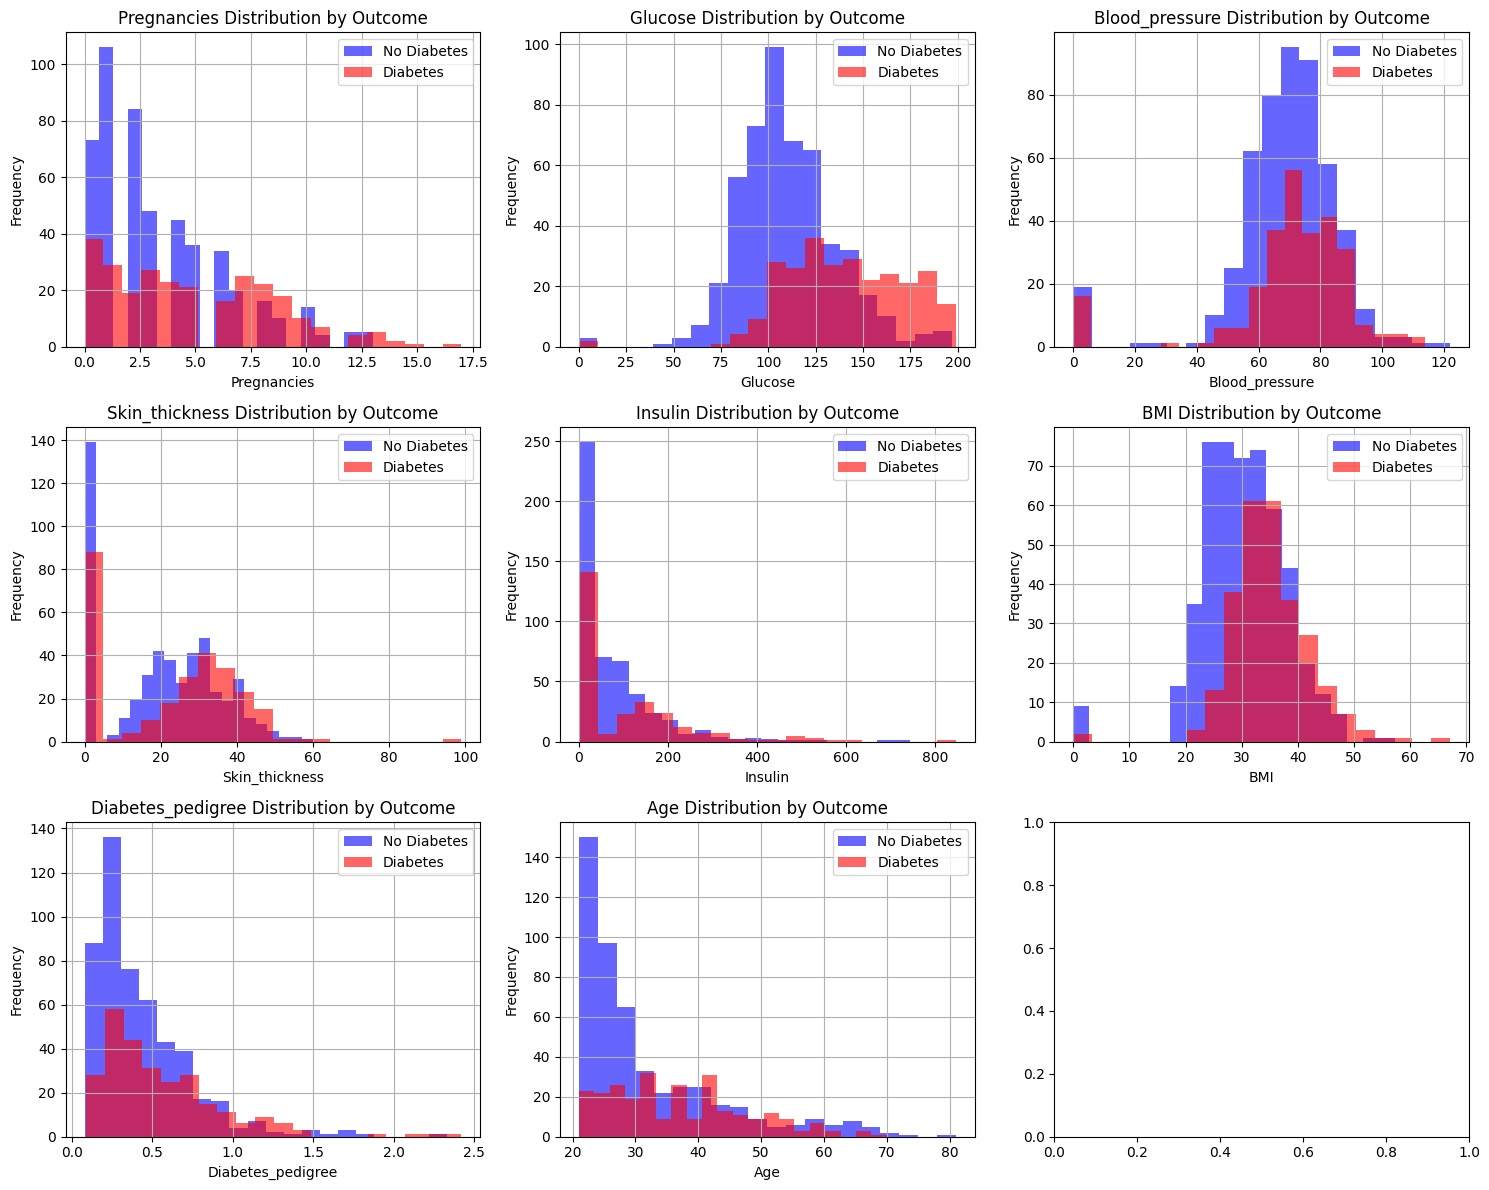

In [6]:
# 1. Histograms of all features
plt.figure(figsize=(15, 12))
pid_data.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribution of All Features', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# 2. Histograms separated by outcome
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = pid_data.columns[:-1]  # All columns except 'Outcome'

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    # Plot histogram for each class
    pid_data[pid_data['Outcome'] == 0][feature].hist(bins=20, alpha=0.6, 
                                                     label='No Diabetes', 
                                                     ax=axes[row, col], color='blue')
    pid_data[pid_data['Outcome'] == 1][feature].hist(bins=20, alpha=0.6, 
                                                     label='Diabetes', 
                                                     ax=axes[row, col], color='red')
    axes[row, col].set_title(f'{feature} Distribution by Outcome')
    axes[row, col].legend()
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

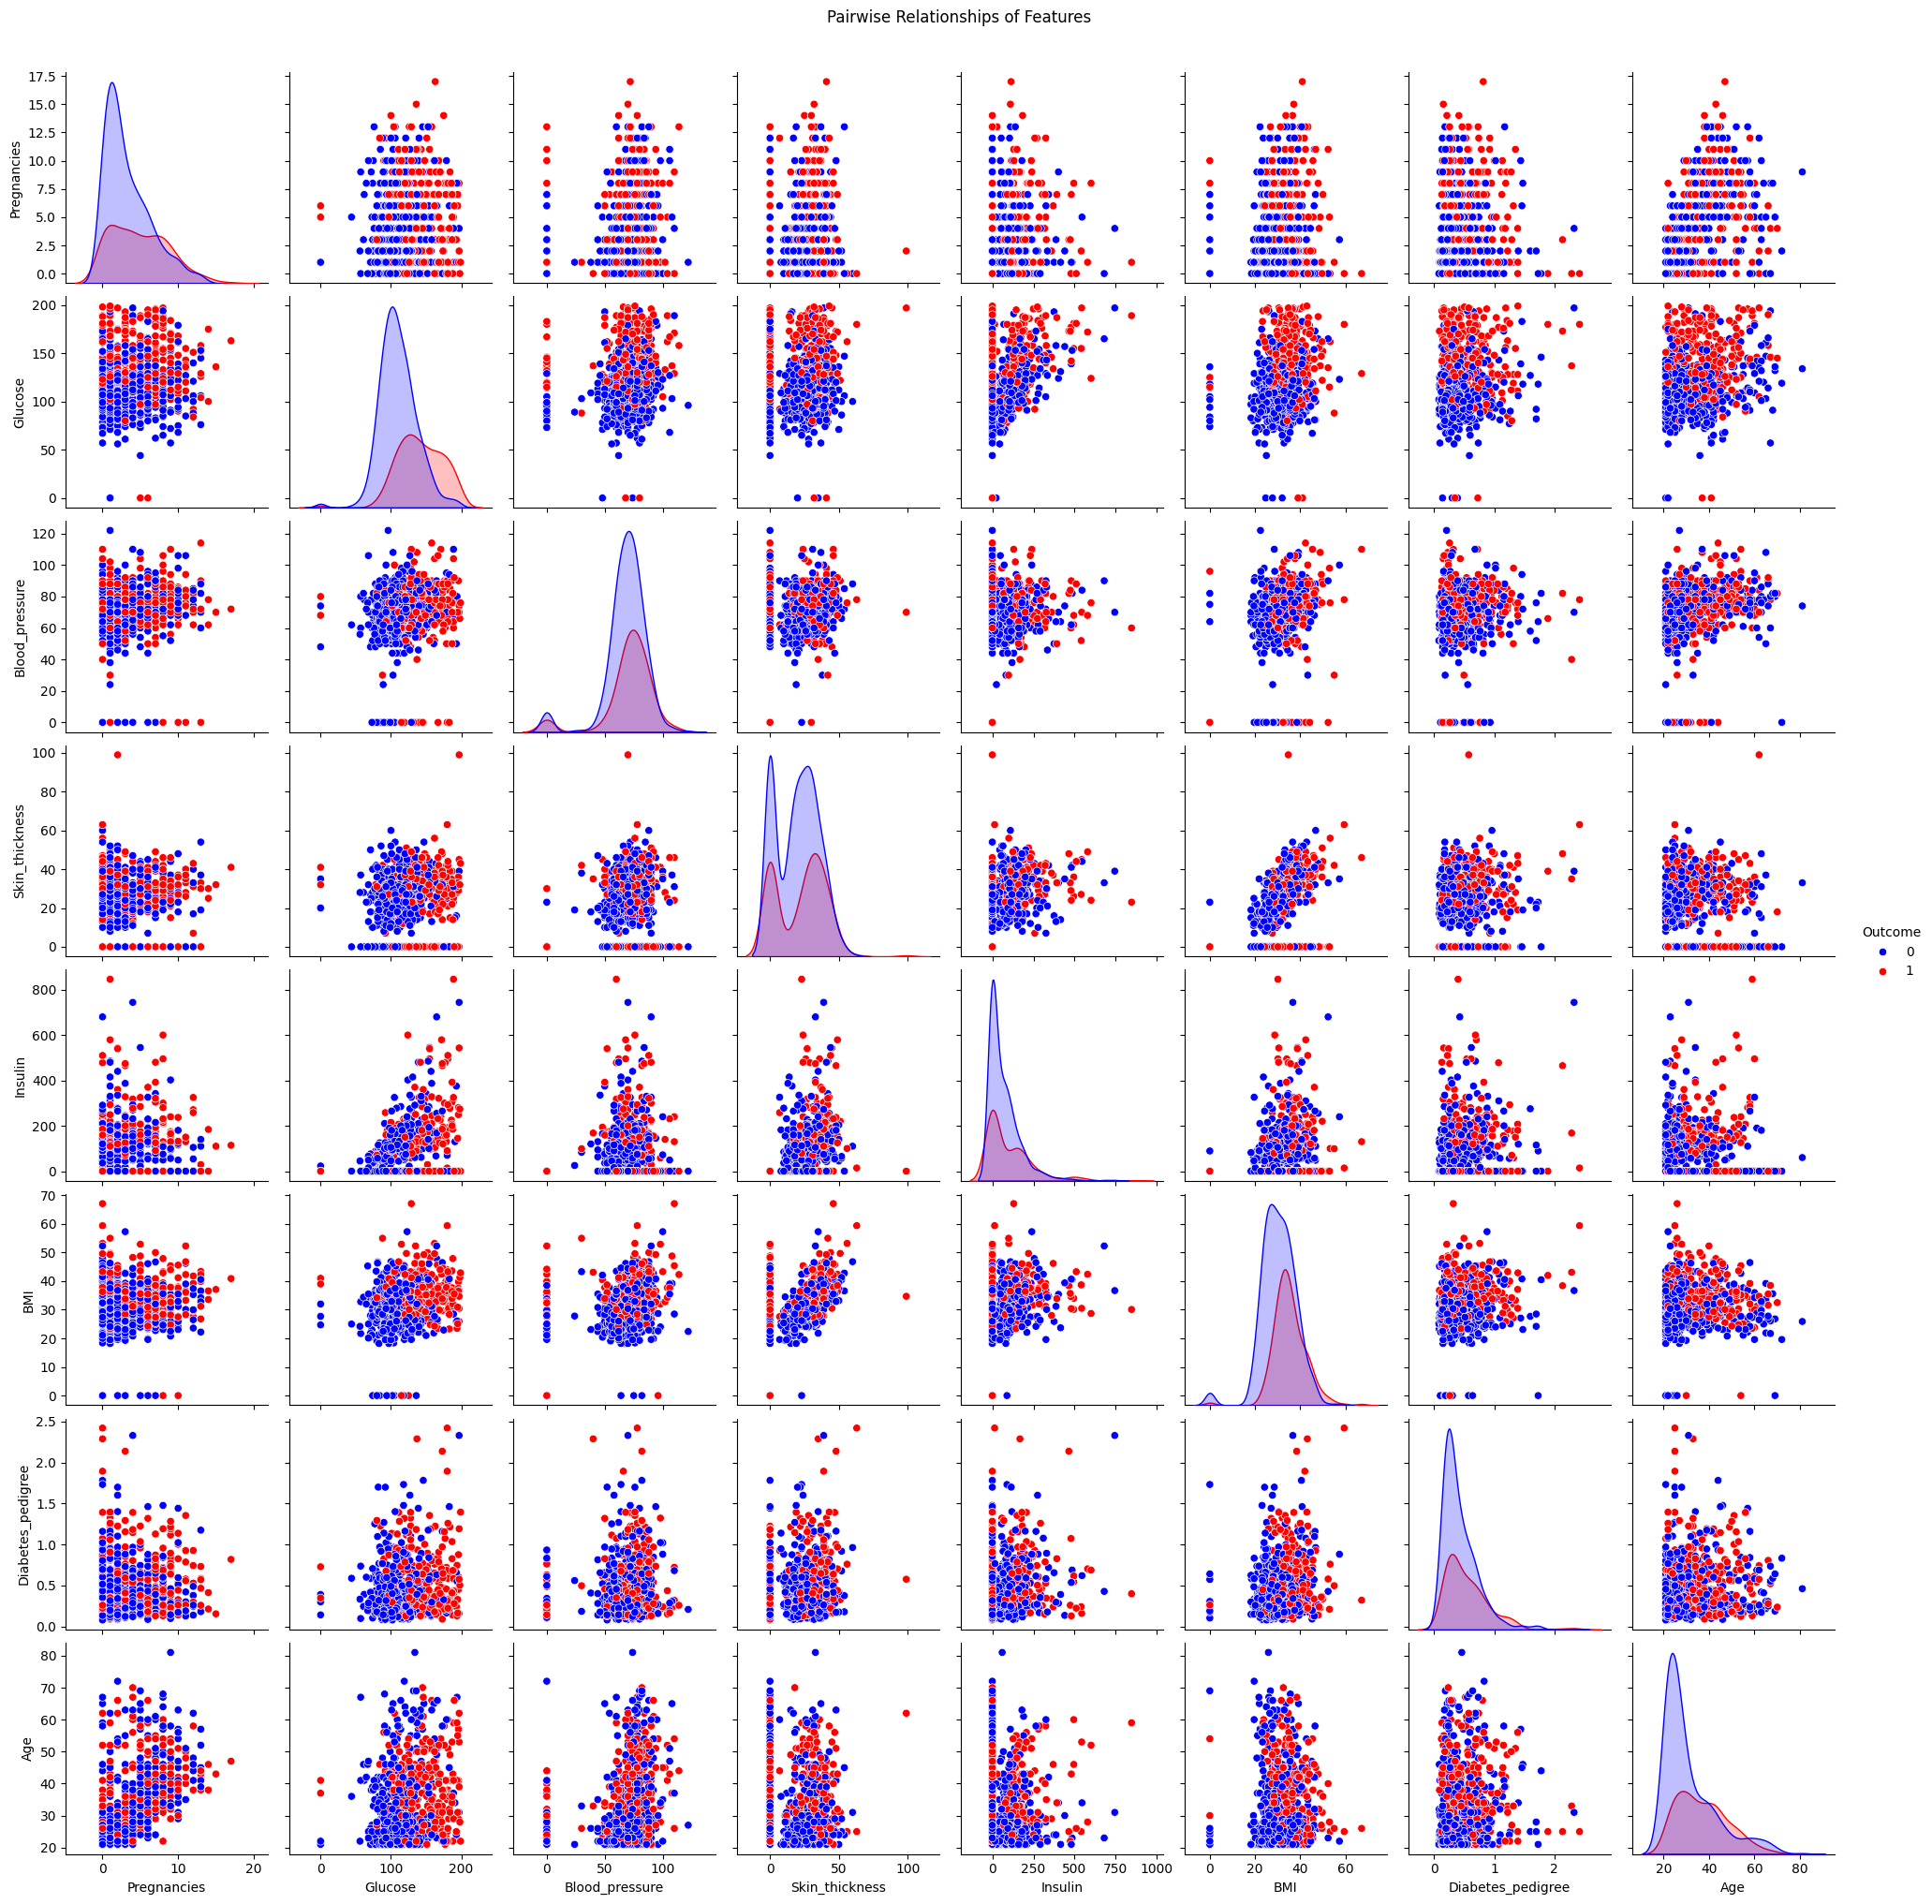

<Figure size 1200x1000 with 0 Axes>

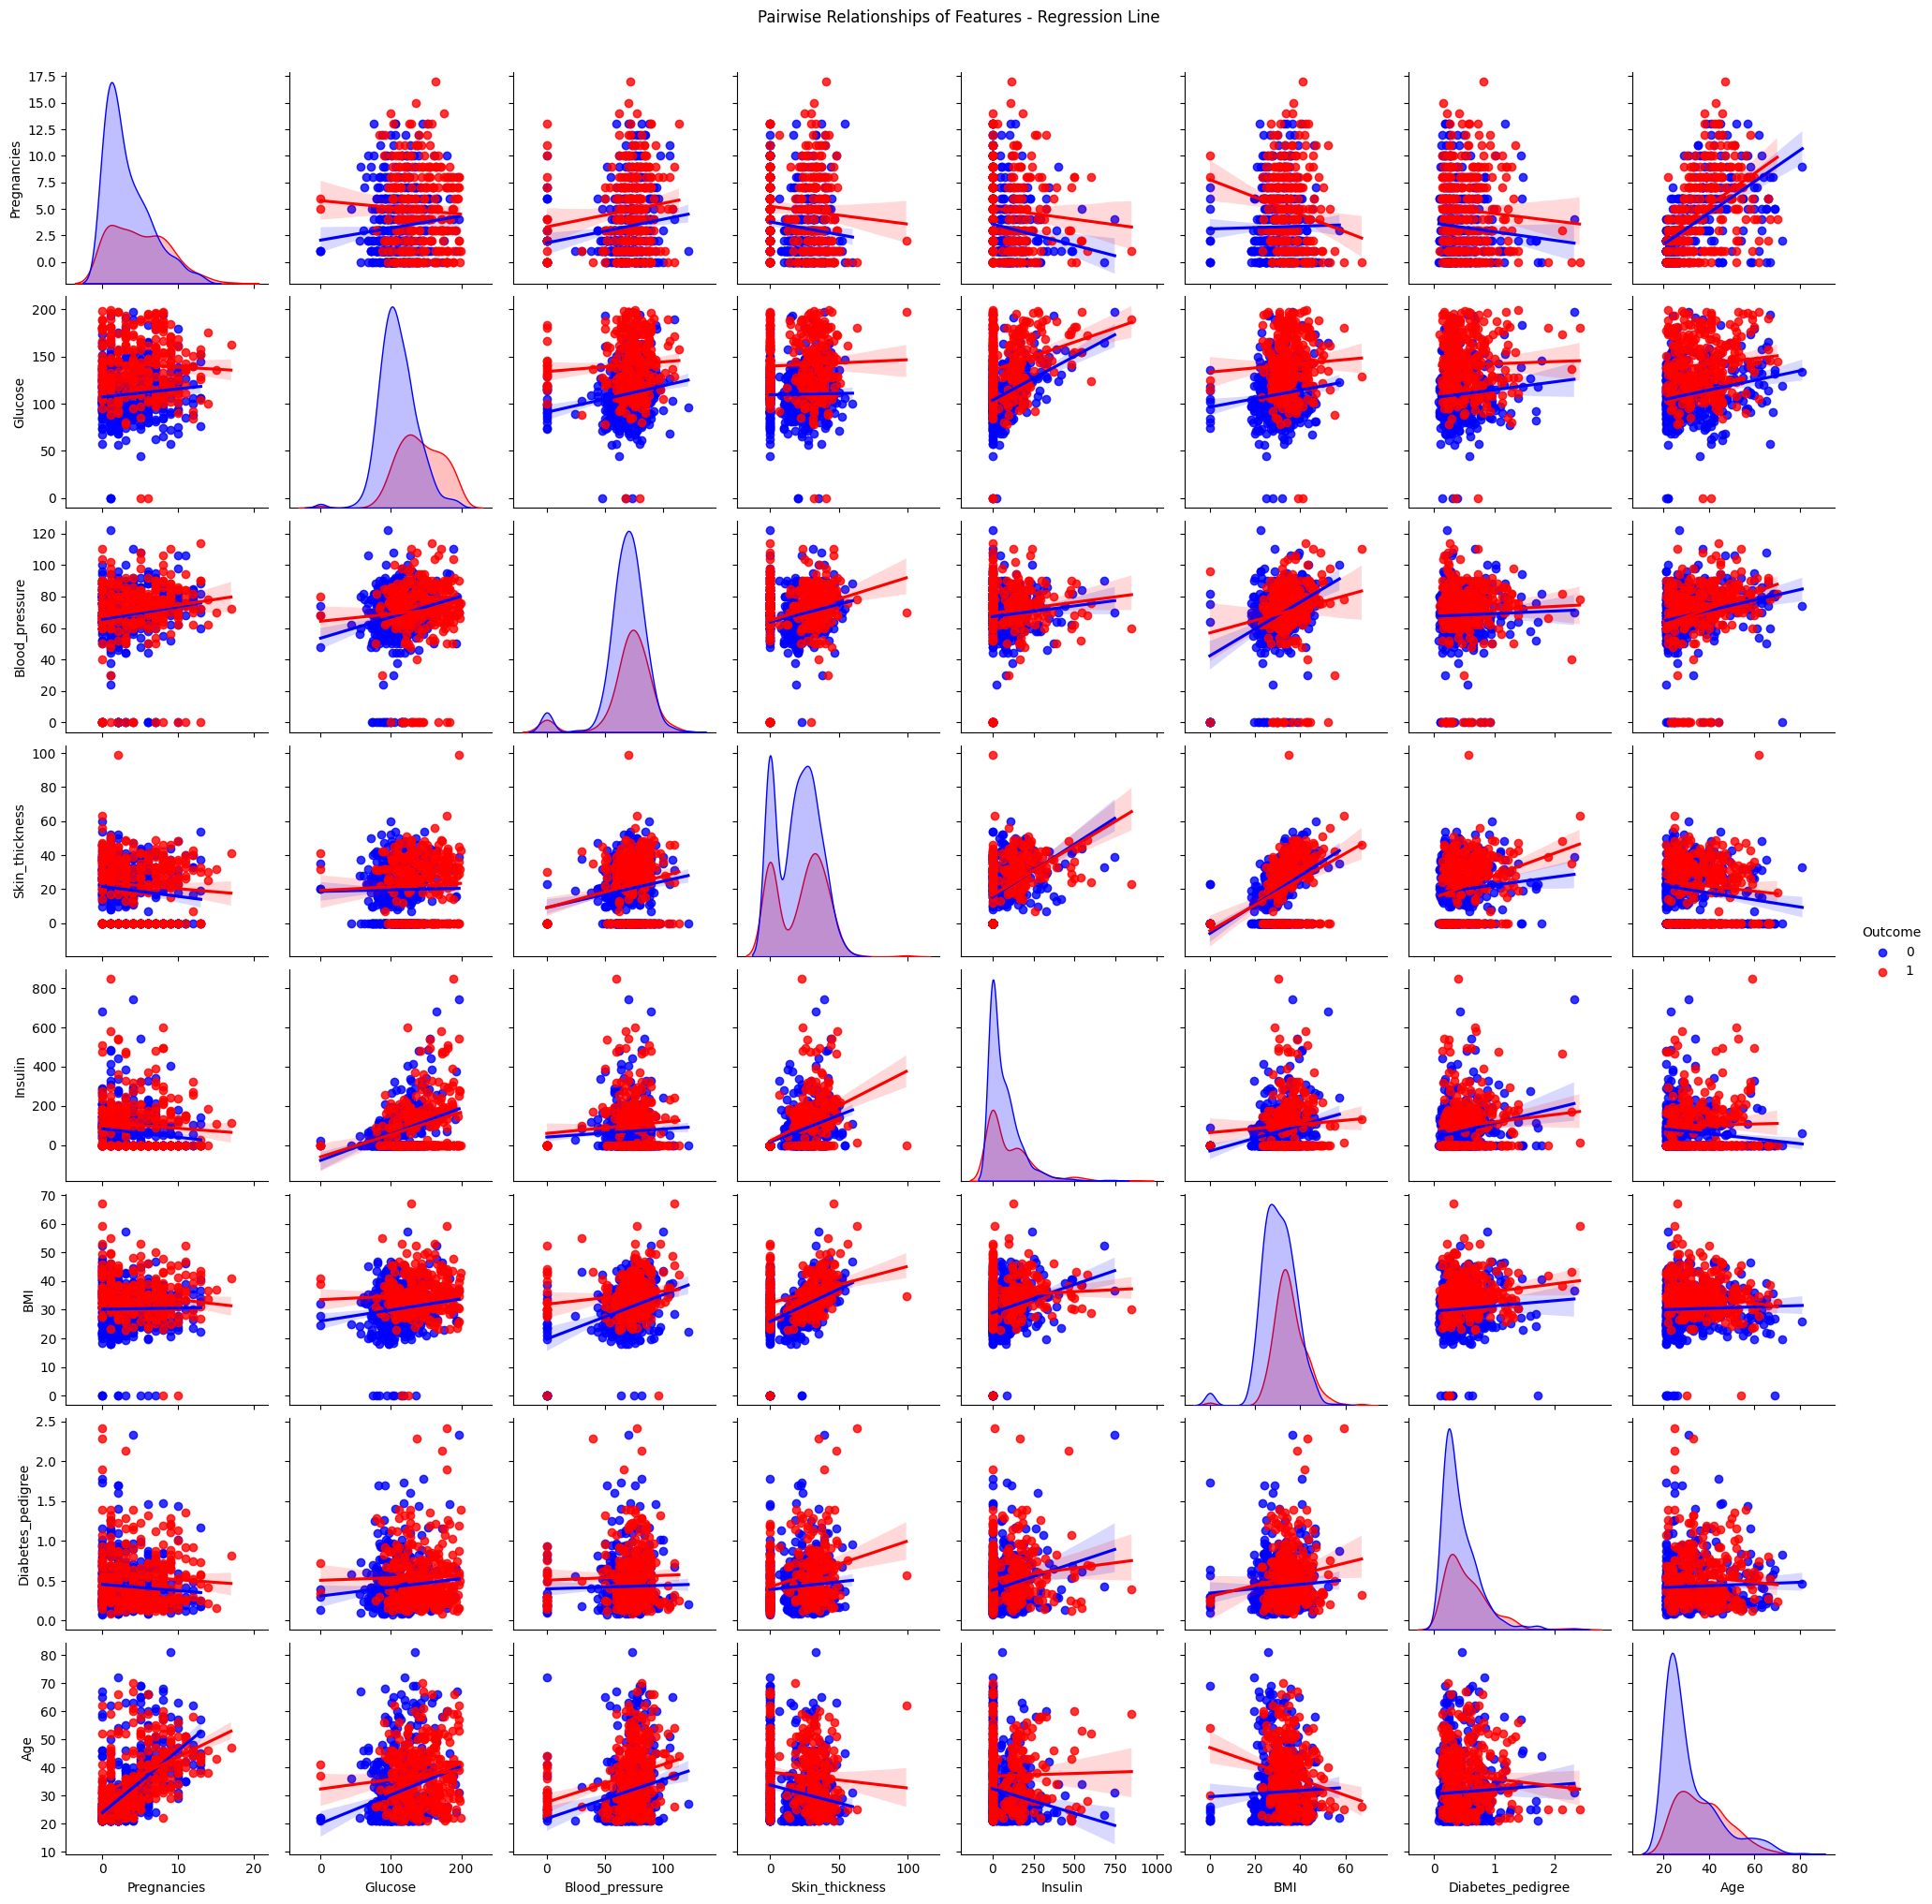

<Figure size 1200x1000 with 0 Axes>

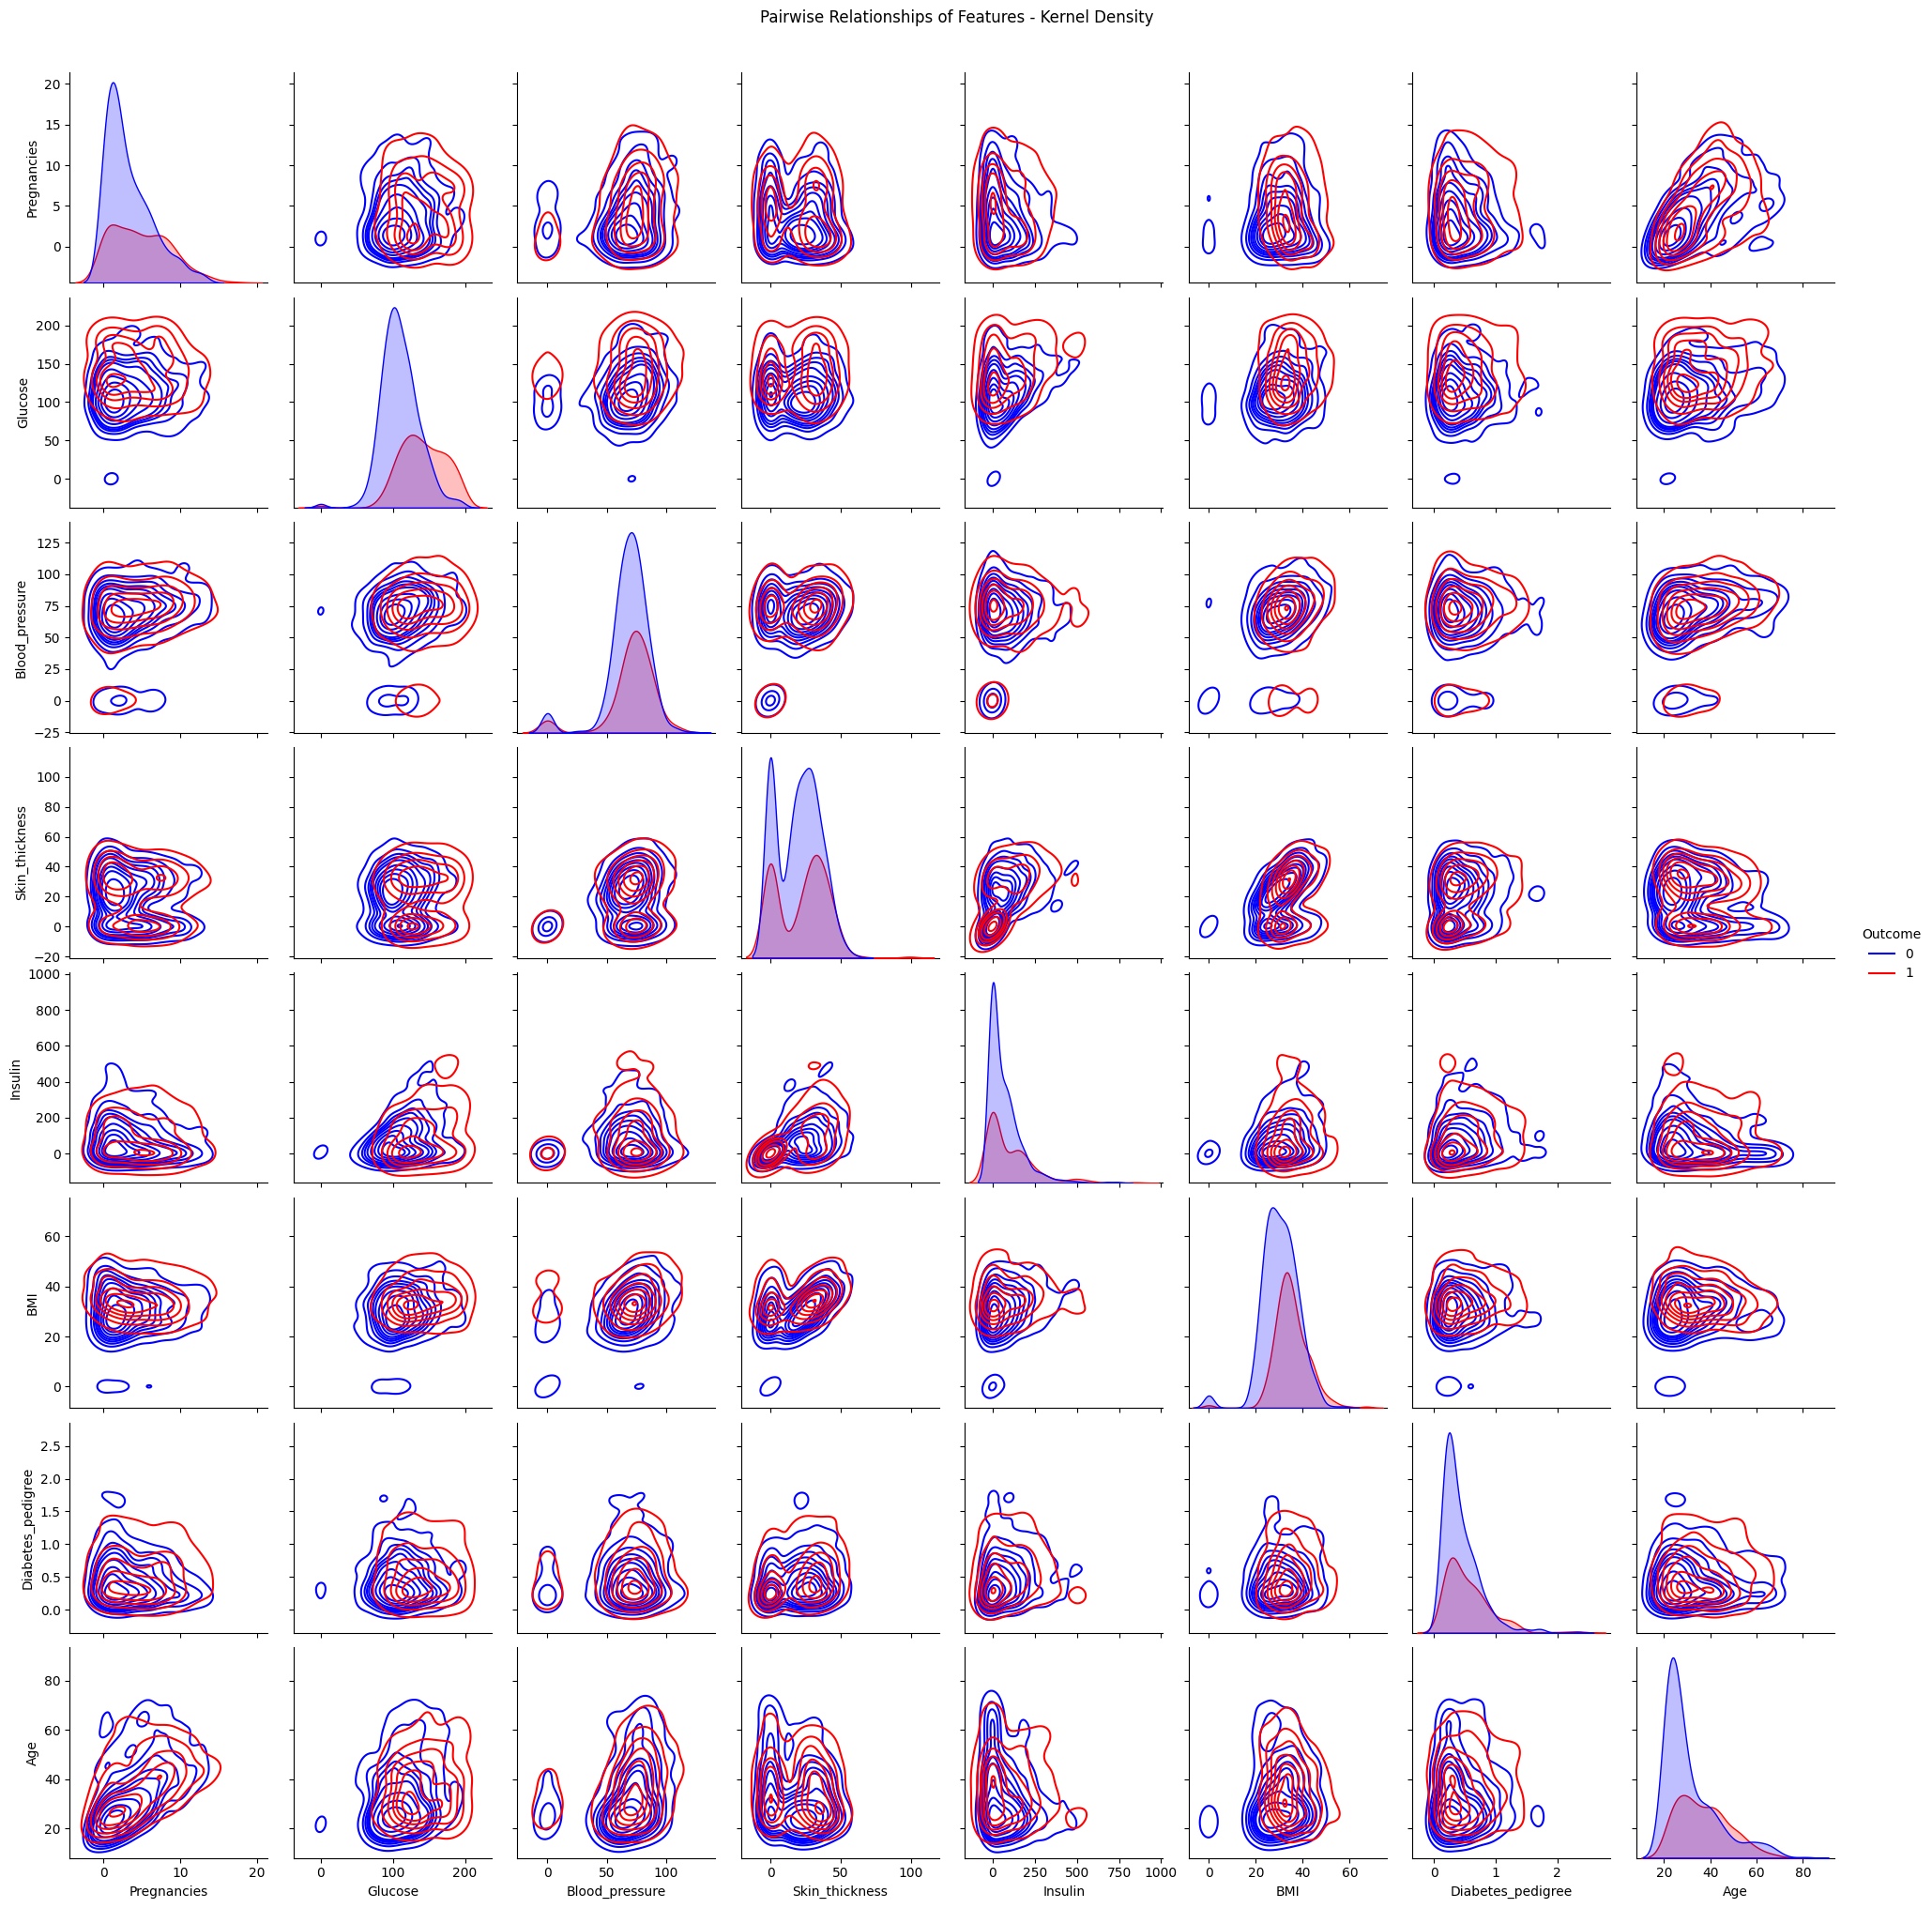

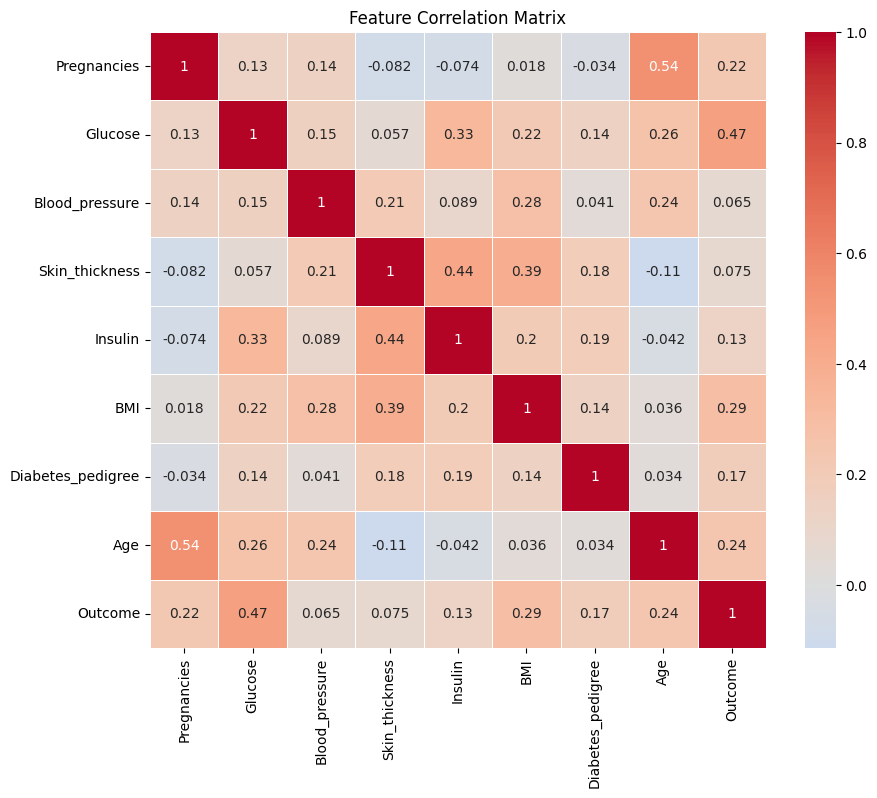

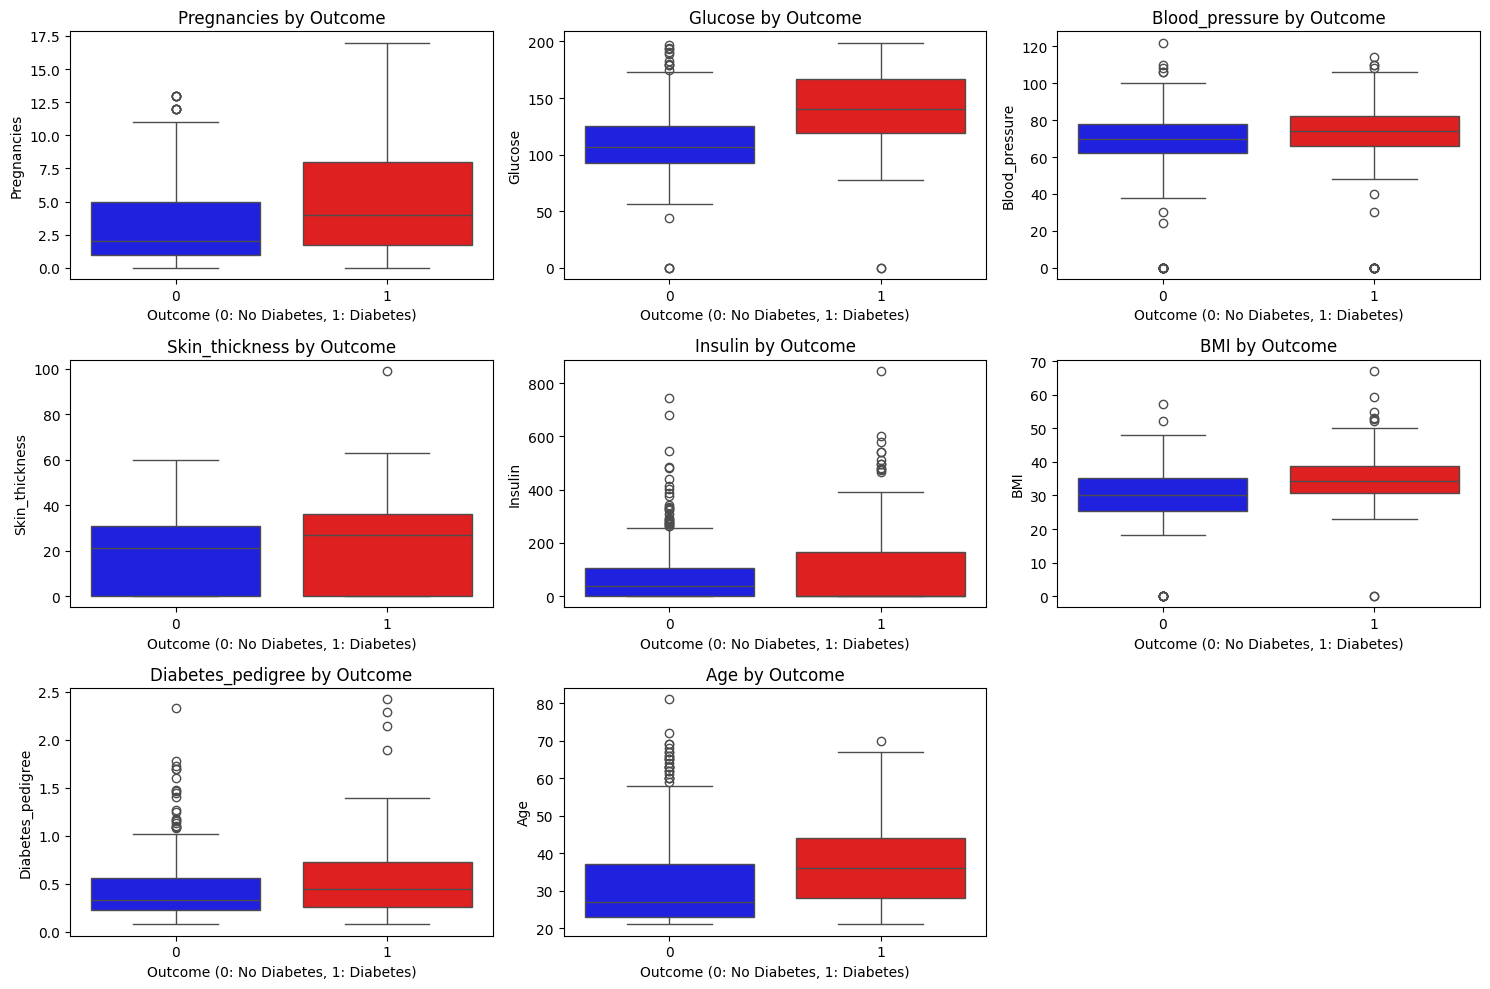

In [ ]:
# 3. Pairwise relationships
plt.figure(figsize=(12, 10))
sns.pairplot(pid_data, hue='Outcome', palette=['blue', 'red'])
plt.suptitle('Pairwise Relationships of Features', y=1.02)
plt.show()

# 4. Pairwise relationships - Regression
plt.figure(figsize=(12, 10))
sns.pairplot(pid_data, hue='Outcome', palette=['blue', 'red'], kind='reg')
plt.suptitle('Pairwise Relationships of Features - Regression Line', y=1.02)
plt.show()



# 4. Pairwise relationships - Regression
plt.figure(figsize=(12, 10))
sns.pairplot(pid_data, hue='Outcome', palette=['blue', 'red'], kind='kde')
plt.suptitle('Pairwise Relationships of Features - Kernel Density', y=1.02)
plt.show()


# 4. Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = pid_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# 5. Box plots to show distribution and outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=feature, data=pid_data, palette=['blue', 'red'])
    plt.title(f'{feature} by Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.tight_layout()
plt.show()


In [7]:
X = pid_data.drop('Outcome', axis=1)
Y = pid_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
random_state=42)

In [8]:
# Train a decision tree classifier using scikit-learn
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# Make predictions
dtc_pred = dtc.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, dtc_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.75


In [ ]:
# Export the decision tree to a dot file
dot_data = export_graphviz(dtc, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Diabetes', 'Diabetes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Misc/decision_tree_diabetes", format='png', cleanup=True)
graph.view()

'Misc/decision_tree.pdf'

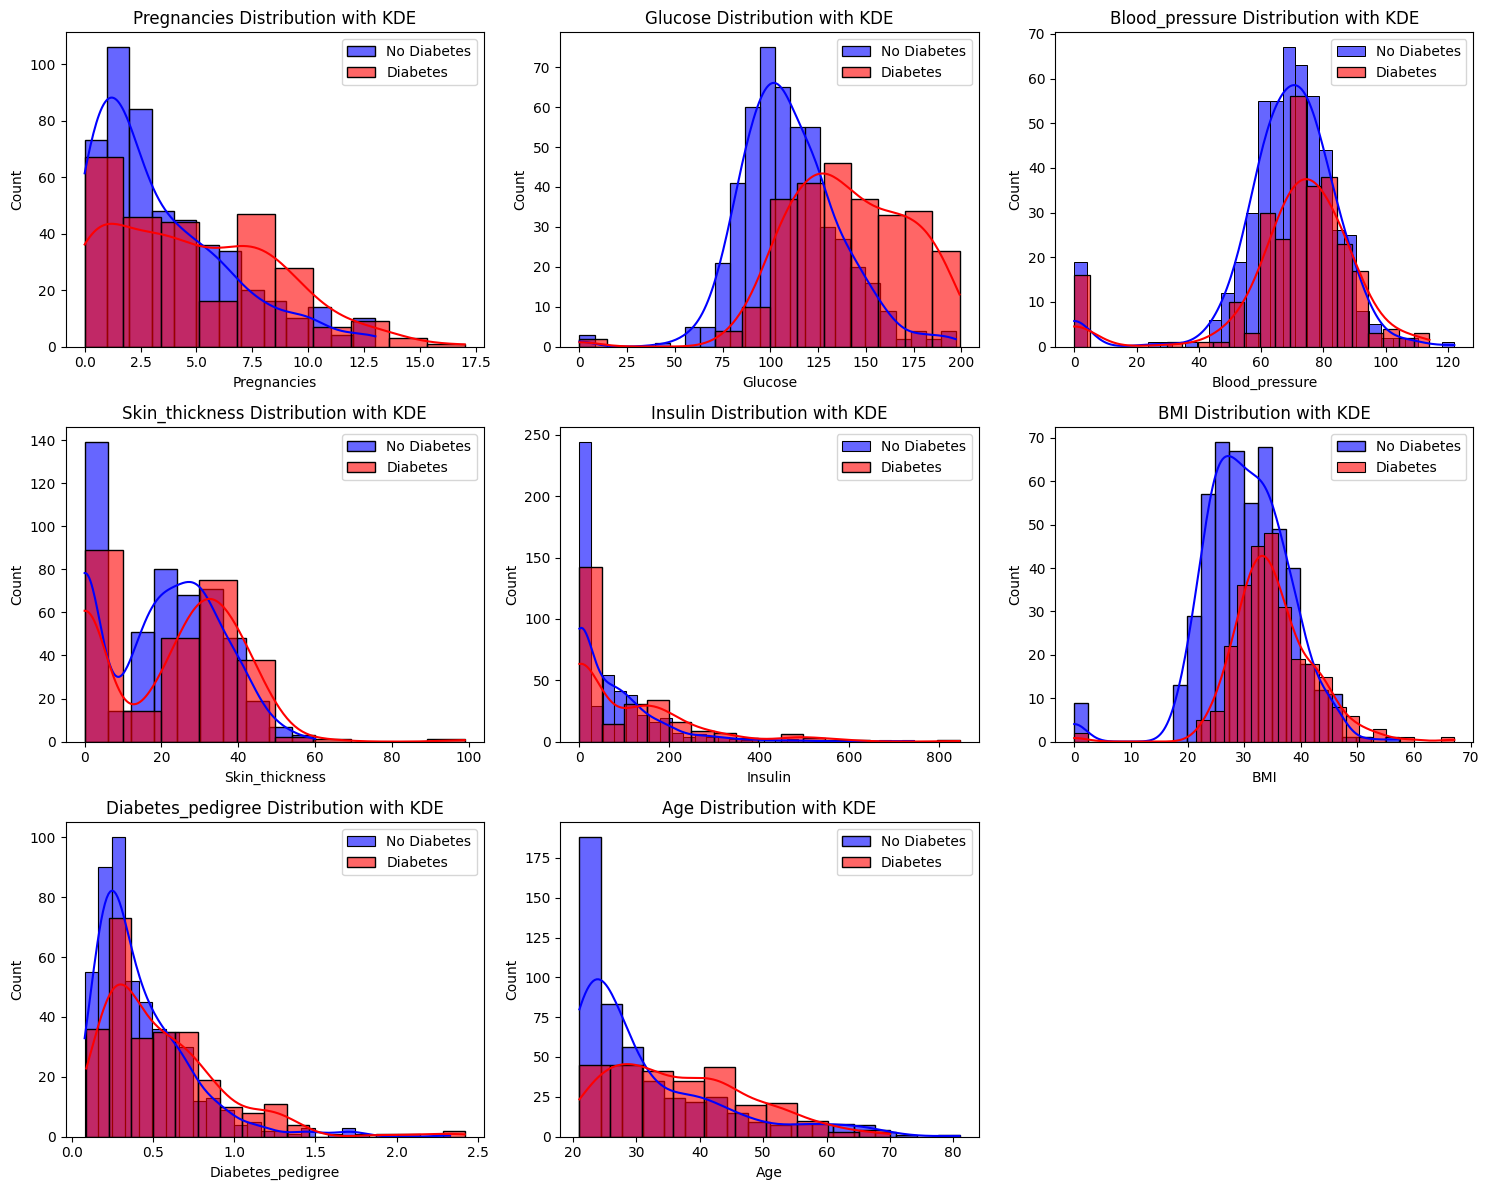

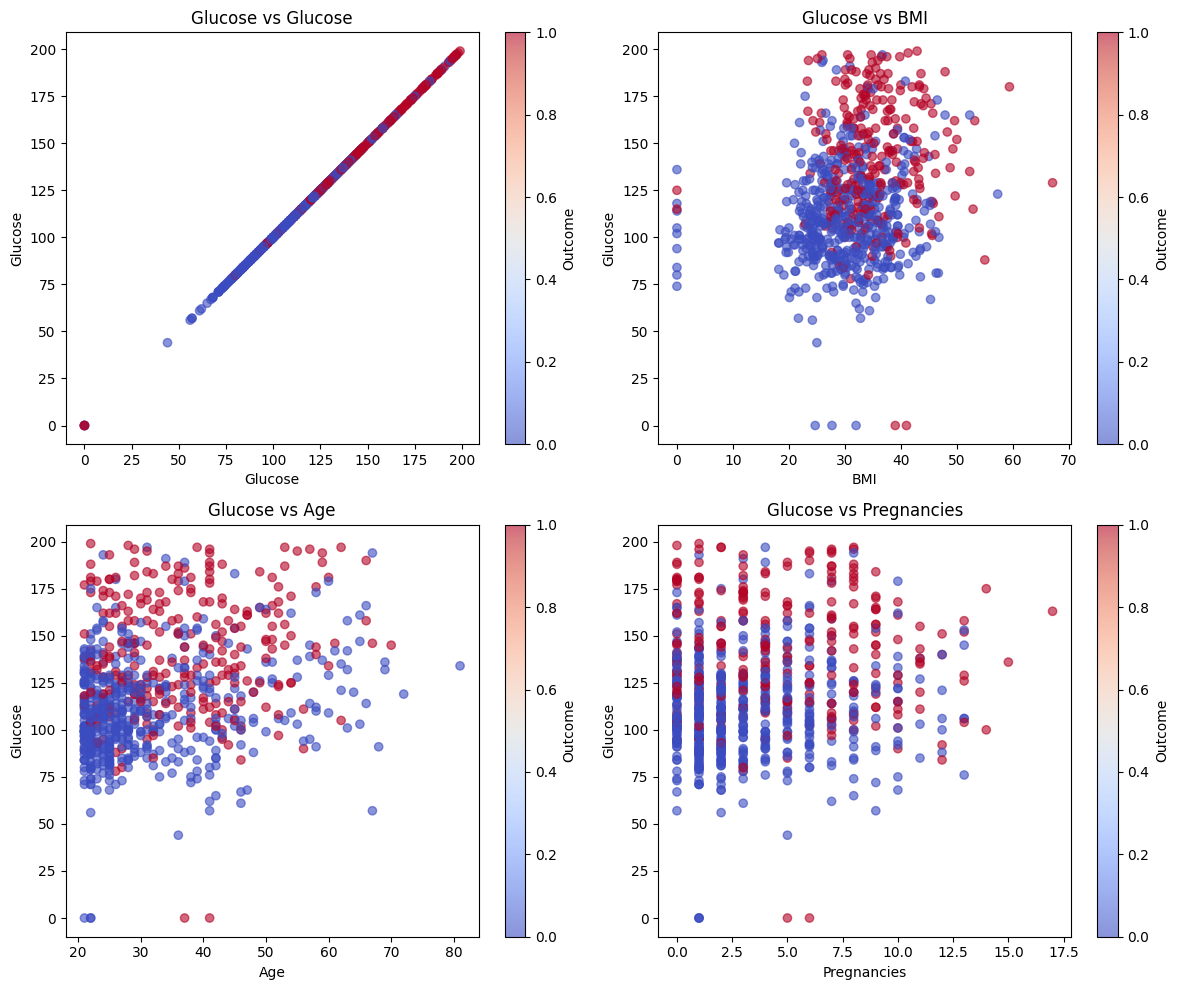

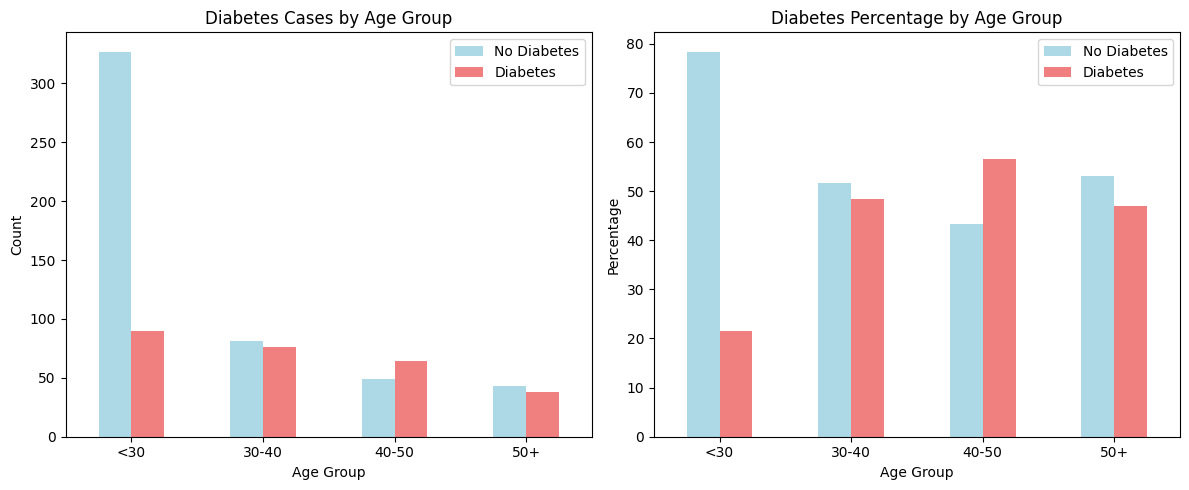

In [10]:
# 8. Advanced Visualizations

# A. Distribution plots with KDE
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    
    # Plot for non-diabetic patients
    sns.histplot(data=pid_data[pid_data['Outcome'] == 0], x=feature, 
                kde=True, alpha=0.6, color='blue', label='No Diabetes')
    
    # Plot for diabetic patients
    sns.histplot(data=pid_data[pid_data['Outcome'] == 1], x=feature, 
                kde=True, alpha=0.6, color='red', label='Diabetes')
    
    plt.title(f'{feature} Distribution with KDE')
    plt.legend()

plt.tight_layout()
plt.show()

# B. Scatter plots of most correlated features
top_features = feature_corr.head(4).index
plt.figure(figsize=(12, 10))

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    scatter = plt.scatter(pid_data[feature], pid_data['Glucose'], 
                         c=pid_data['Outcome'], cmap='coolwarm', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Glucose')
    plt.title(f'Glucose vs {feature}')
    plt.colorbar(scatter, label='Outcome')

plt.tight_layout()
plt.show()

# C. Age group analysis
pid_data['Age_Group'] = pd.cut(pid_data['Age'], bins=[0, 30, 40, 50, 100], 
                              labels=['<30', '30-40', '40-50', '50+'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
age_outcome = pd.crosstab(pid_data['Age_Group'], pid_data['Outcome'])
age_outcome.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Diabetes Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
age_percent = pd.crosstab(pid_data['Age_Group'], pid_data['Outcome'], normalize='index') * 100
age_percent.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Diabetes Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Exercises

## 1. Load the Iris dataset and display the first five rows. What are the feature names and target classes?

In [7]:

#Load Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

#Display the first few rows of data
print("iris df head: ")
print("----------------------\n")
print(iris_df.head())
print("Descriptive Statistics: ")
print("----------------------\n")
print(iris_df.describe())
print("iris df columns: ")
print("----------------------\n")
print(iris_df.columns)
print("shape: ")
print("----------------------\n")
print(X.shape)
print("----------------------\n") 
print(iris_df.info())
print("Null values in each column:")
print("----------------------\n")
print(iris_df.isnull().sum())




iris df head: 
----------------------

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Descriptive Statistics: 
----------------------

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
7

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0

## 2. Visualize the pairwise relationships between the features of the Iris dataset. What insights can you draw from the scatter plots?

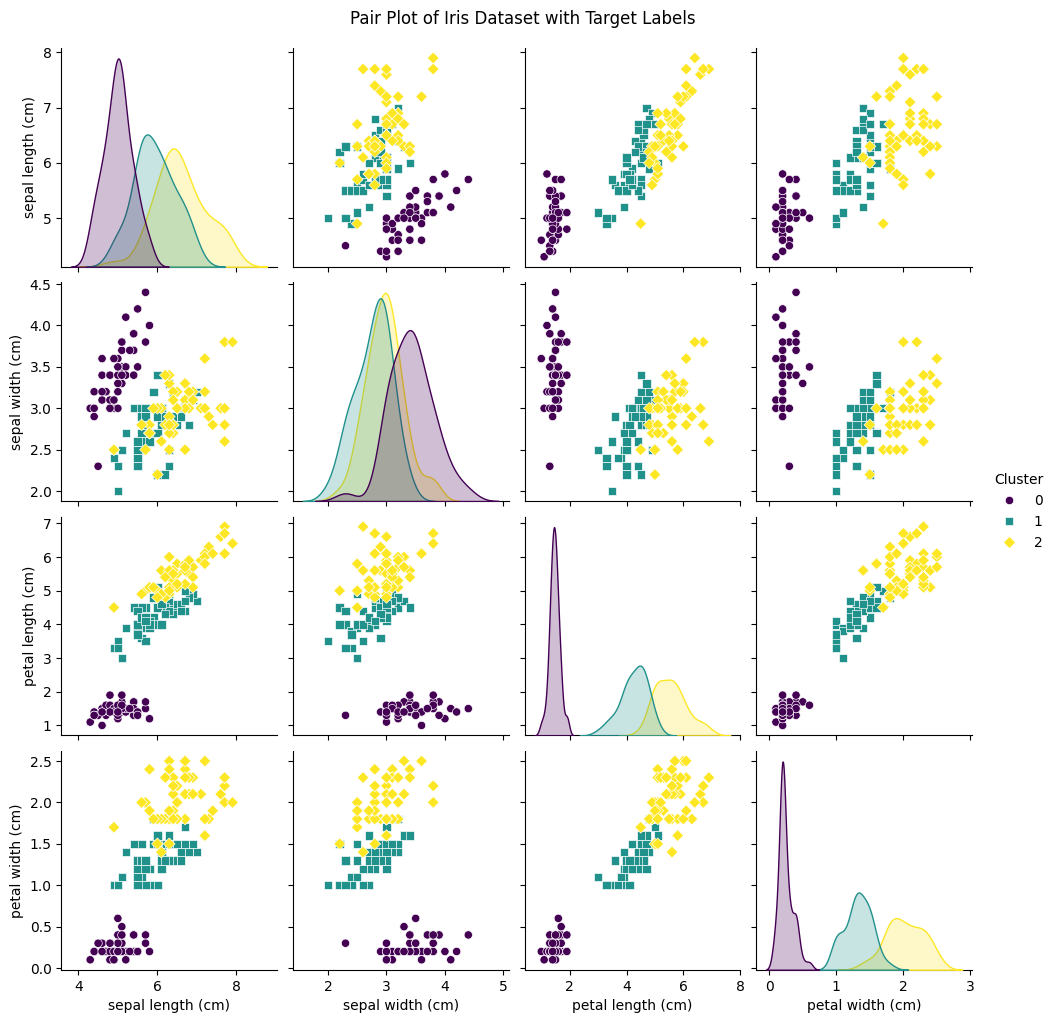

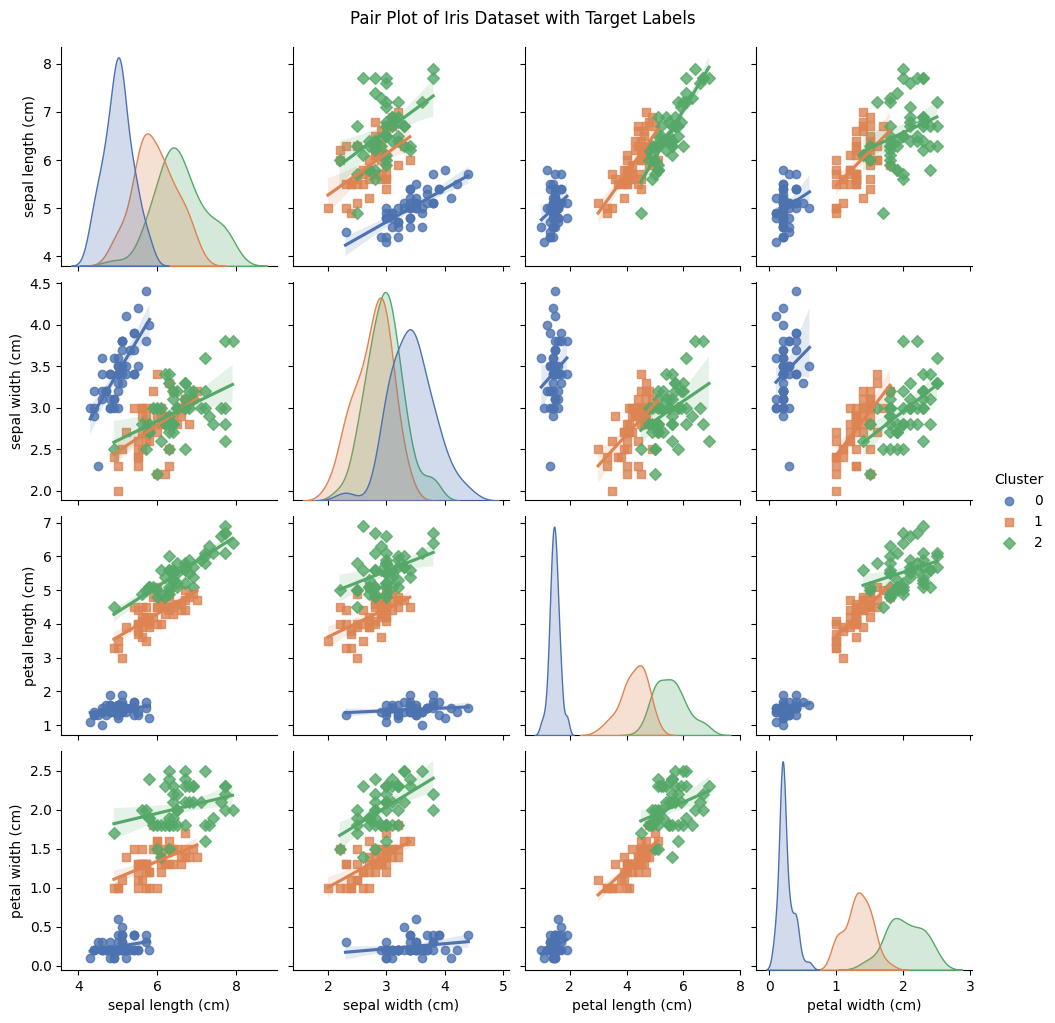

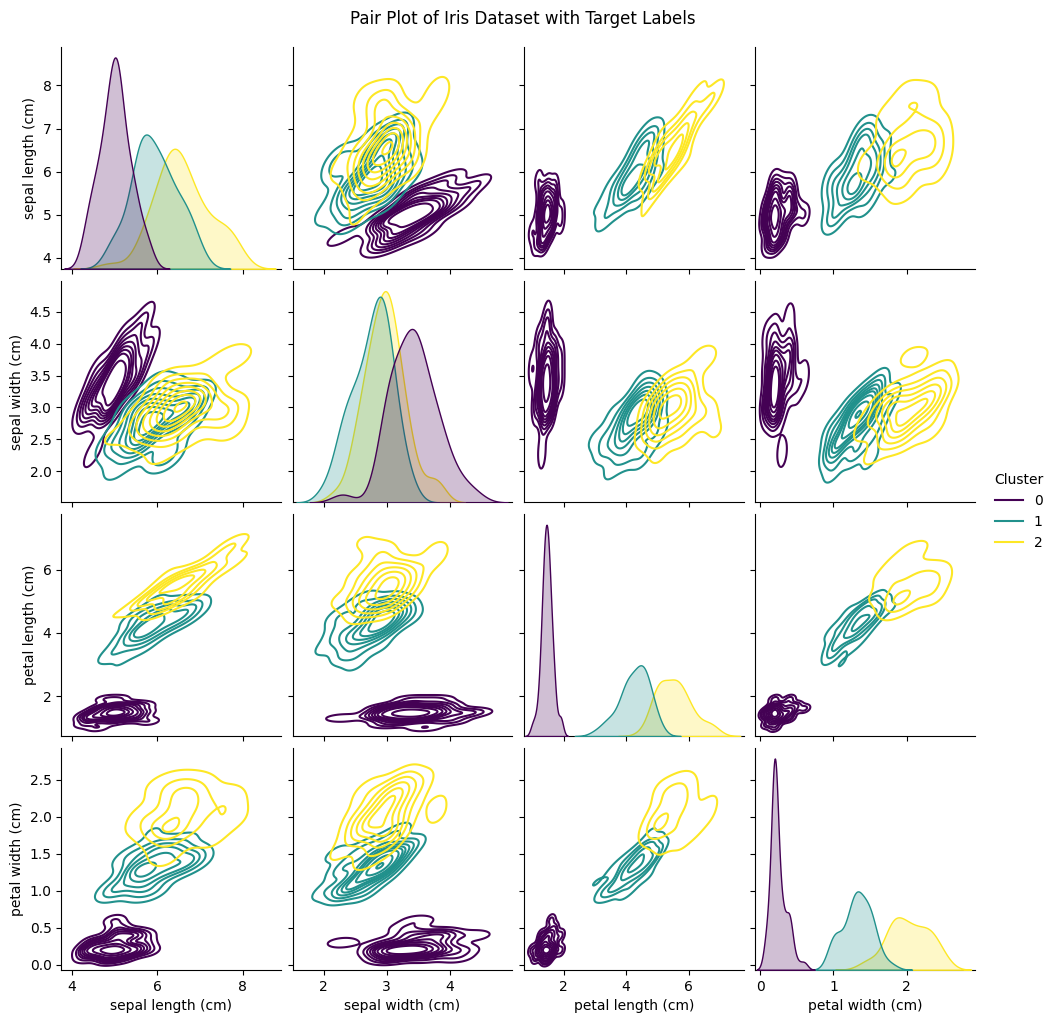

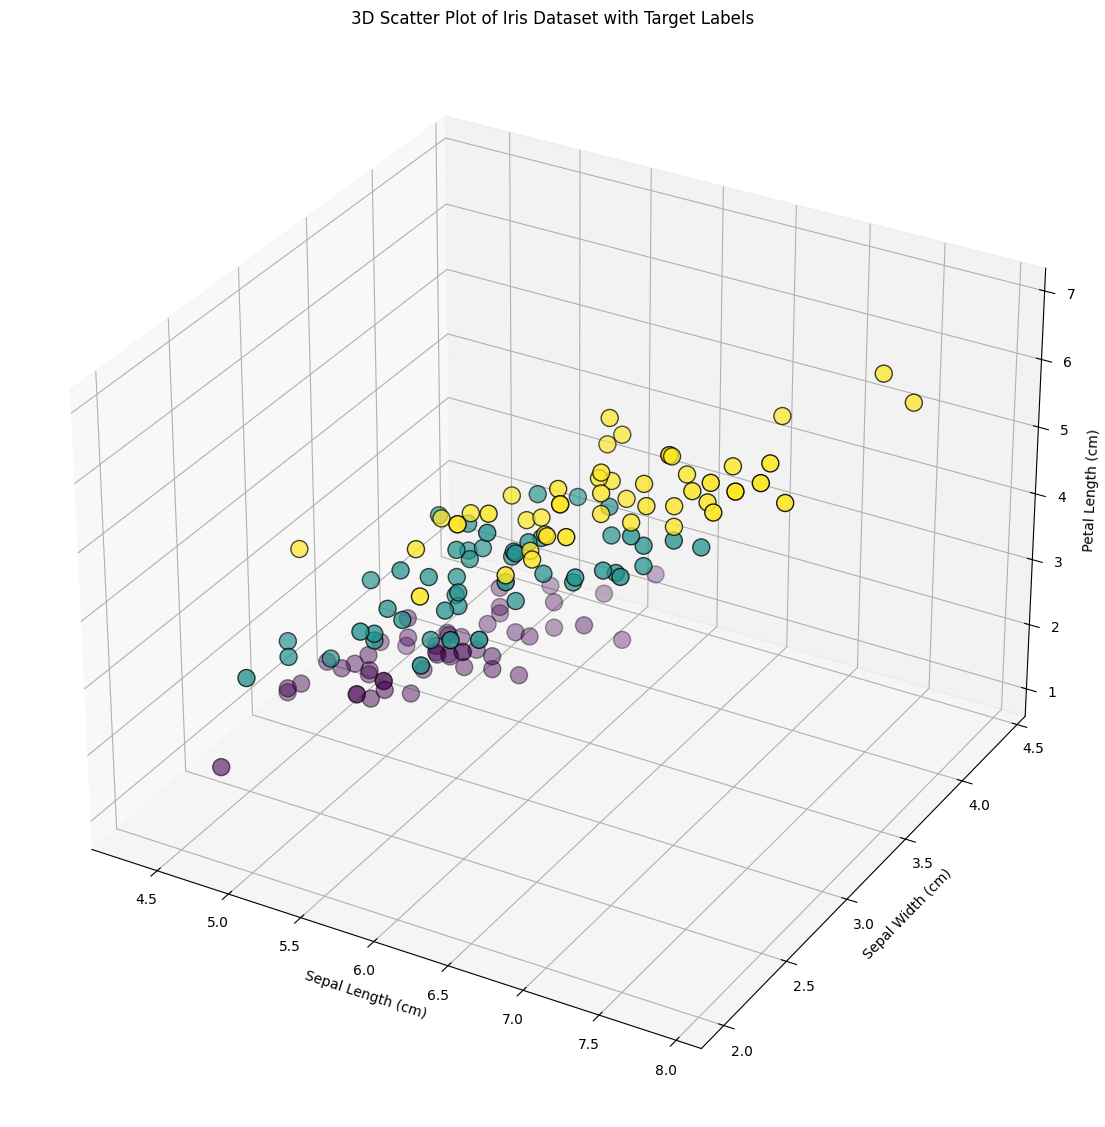

In [8]:
iris_df['Cluster'] = iris.target
# Pair Plot with Cluster Labels
sns.pairplot(iris_df, hue='Cluster', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset with Target Labels', y=1.02)
plt.show()

sns.pairplot(iris_df, hue='Cluster', palette='deep', markers=["o", "s", "D"], kind='reg')
plt.suptitle('Pair Plot of Iris Dataset with Target Labels', y=1.02)
plt.show()

sns.pairplot(iris_df, hue='Cluster', palette='viridis', markers=["o", "s", "D"], kind='kde')
plt.suptitle('Pair Plot of Iris Dataset with Target Labels', y=1.02)
plt.show()


from mpl_toolkits.mplot3d import Axes3D
# 3D Scatter Plot for Sepal Length, Sepal Width, and Petal Length
fig = plt.figure(figsize=(14, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], iris_df['petal length (cm)'], c=iris_df['Cluster'], cmap='viridis', edgecolor='k', s=150)
ax.set_title('3D Scatter Plot of Iris Dataset with Target Labels')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.show()


- speal width and length are strongly fall within the same narrow range across 3 species (targets), that is the plots are in very close range overlaying each other
- petal length and width is some what more varying in ranges for each of the speies, that is, the correlation could be a charachterstic destinctively defining for each of the species

- in all each of the cases ( peatl length vs petal width ) and ( sepal length vs sepal width ), species 0 is more distnct in its rang in most plot and could be more predicted with higher confidence, species 1 and 2 have tighter boundary and within close range in comparsant and co-cross each other, though species 1 is in the lower range end, and species 2 on the higher range end 


## 3. Train a decision tree classifier on the Iris dataset using scikit-learn. What is the accuracy of this baseline model on the test set?

In [24]:
# Split the Iris dataset into train and test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Train a decision tree classifier
iris_dtc = DecisionTreeClassifier(random_state=42)
iris_dtc.fit(X_train_iris, y_train_iris)

# Predict on the test set
iris_pred = iris_dtc.predict(X_test_iris)

# Calculate accuracy
iris_accuracy = accuracy_score(y_test_iris, iris_pred)
print(f"Iris Decision Tree Test Accuracy: {iris_accuracy:.2f}")

Iris Decision Tree Test Accuracy: 1.00


## 4. Visualize the decision tree. What are the most important features according to the decision tree?

In [25]:
# Export the decision tree to a dot file
dot_data_iris = export_graphviz(iris_dtc, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=['0', '1', '2'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data_iris)
graph.render("../Misc/decision_tree_iris", format='png', cleanup=True)
graph.view()

'../Misc/decision_tree_iris.pdf'

 Petal length > petal width > sepal width
 The most important feature of course was the one at the root of the node ( petal length) as the algorithm works but calulating the wighted average of impurity of the root feature nodes entropy (randomness/decissivenss) created resulting children nodes, and then calculating every possible split of the children nodes gini, the best chosen split would be the one that leads to a decision giving us highest information gain to lower entropy and impurity, i.e. result in more decisiveness

## 5. Perform hyperparameter optimization for this decision tree classifier using GridSearchCV with 5-fold cross-validation. Identify the
best hyperparameters and evaluate the model’s performance on the test set. Compare the optimized model’s performance with the
baseline model.

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.96

--- Test Set Performance ---
Optimized Decision Tree Test Accuracy: 1.00
Baseline Decision Tree Test Accuracy: 1.00


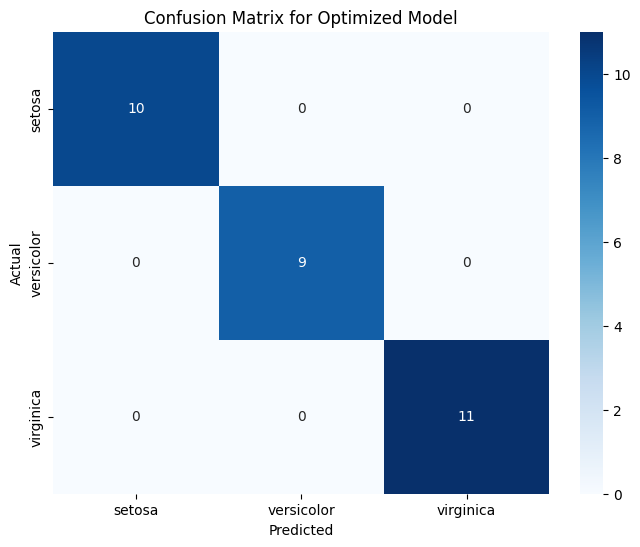

In [26]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy'] # Removed other criteria not suitable for classification
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_iris, y_train_iris)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# More robust accuracy score from cross-validation
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluate the optimized model on the test set
best_dtc = grid_search.best_estimator_
optimized_pred = best_dtc.predict(X_test_iris)
optimized_accuracy = accuracy_score(y_test_iris, optimized_pred)

print(f"\n--- Test Set Performance ---")
print(f"Optimized Decision Tree Test Accuracy: {optimized_accuracy:.2f}")
print(f"Baseline Decision Tree Test Accuracy: {iris_accuracy:.2f}")

# Display the confusion matrix to see the predictions in detail
cm = confusion_matrix(y_test_iris, optimized_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized Model')
plt.show()
